 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
# ignoring all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
data = Path('../Starter_Code/Resources/whale_returns.csv')

In [3]:
# Count nulls
whales = pd.read_csv(data,index_col='Date',infer_datetime_format=True,parse_dates=True)
whales.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [61]:
# Drop nulls
whales.dropna(inplace=True)
whales.isnull().sum()
whales.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo = Path('../Starter_Code/Resources/algo_returns.csv')

In [6]:
# Count nulls
algorithmic = pd.read_csv(algo,index_col='Date',infer_datetime_format=True,parse_dates=True)
algorithmic.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algorithmic.dropna(inplace=True)

In [8]:
algorithmic.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [60]:
algorithmic.sort_index()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500h = Path('../Starter_Code/Resources/sp500_history.csv')

In [11]:
# Check Data Types
sp500 = pd.read_csv(sp500h,index_col='Date',infer_datetime_format=True,parse_dates=True)
sp500.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace("$", "")
sp500['Close'] = sp500['Close'].astype('float')
sp500.dtypes

Close    float64
dtype: object

In [59]:
# Calculate Daily Returns

sp500_return = sp500.pct_change()
sp500_return.head().sort_index()


,Close
Date,
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764
2019-04-23,NaN


In [57]:
# Drop nulls
sp500_return.dropna(inplace=True)
sp500_return.head().sort_index()

,Sp500
Date,
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764


In [55]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return = sp500_return.rename(columns={'Close': 'Sp500'})
sp500_return.head().sort_index()

,Sp500
Date,
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577
2019-04-18,-0.001011
2019-04-22,-0.008764


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_info = pd.concat([whales,algorithmic,sp500_return], axis="columns",join='inner')
combined_info.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

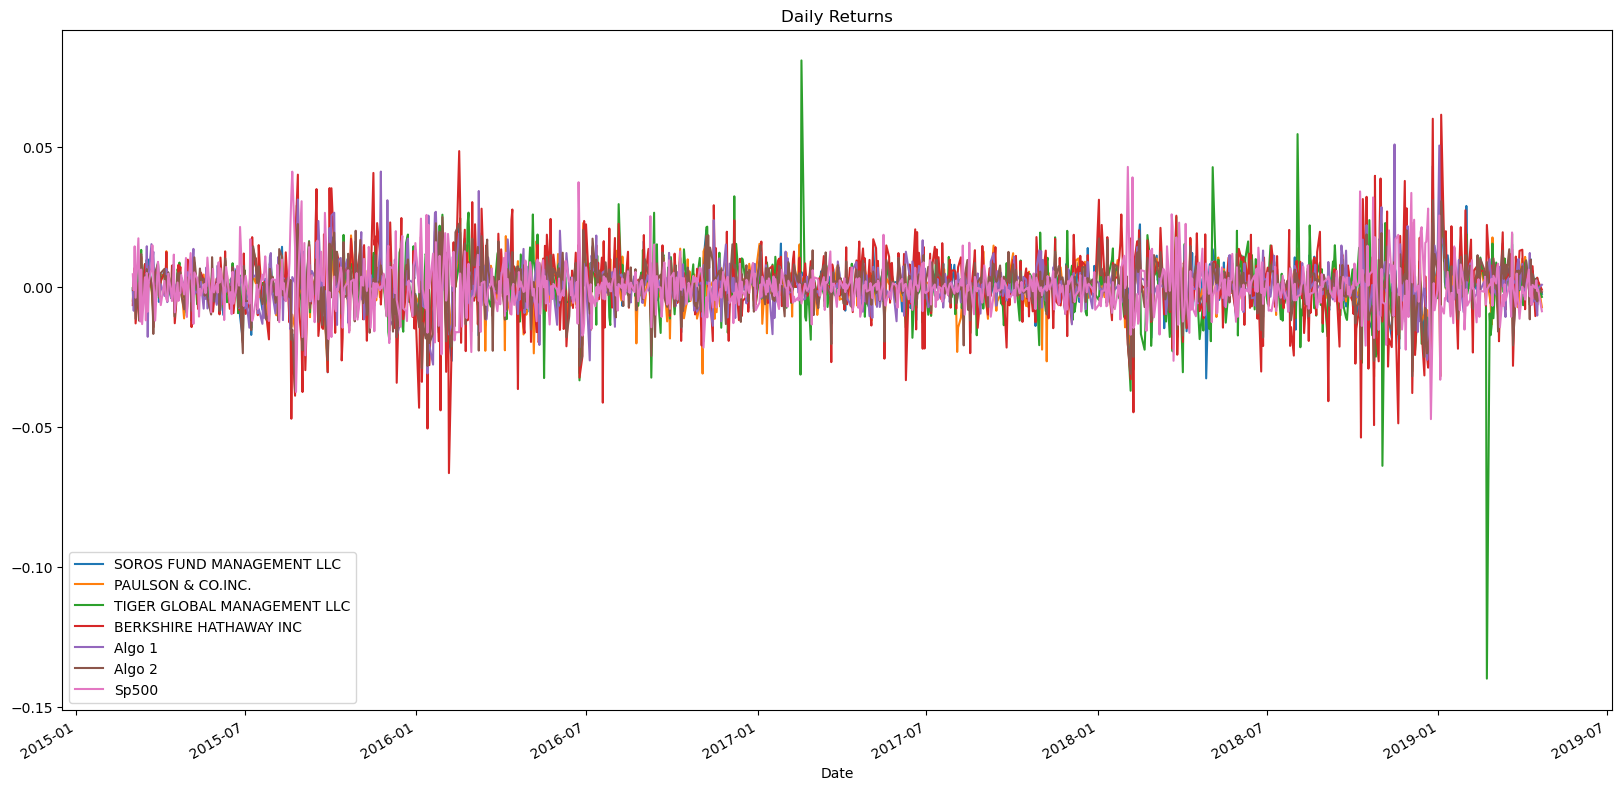

In [17]:
# Plot daily returns of all portfolios
combined_info.plot(figsize=(20,10),title = 'Daily Returns');


#### Calculate and Plot cumulative returns.

In [56]:
combined_info.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500,my research
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000371
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.004421
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.013919
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-0.000851
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003361
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.002657
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.006964
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001872


In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_info).cumprod() - 1
cumulative_returns.head()
# Plot cumulative returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


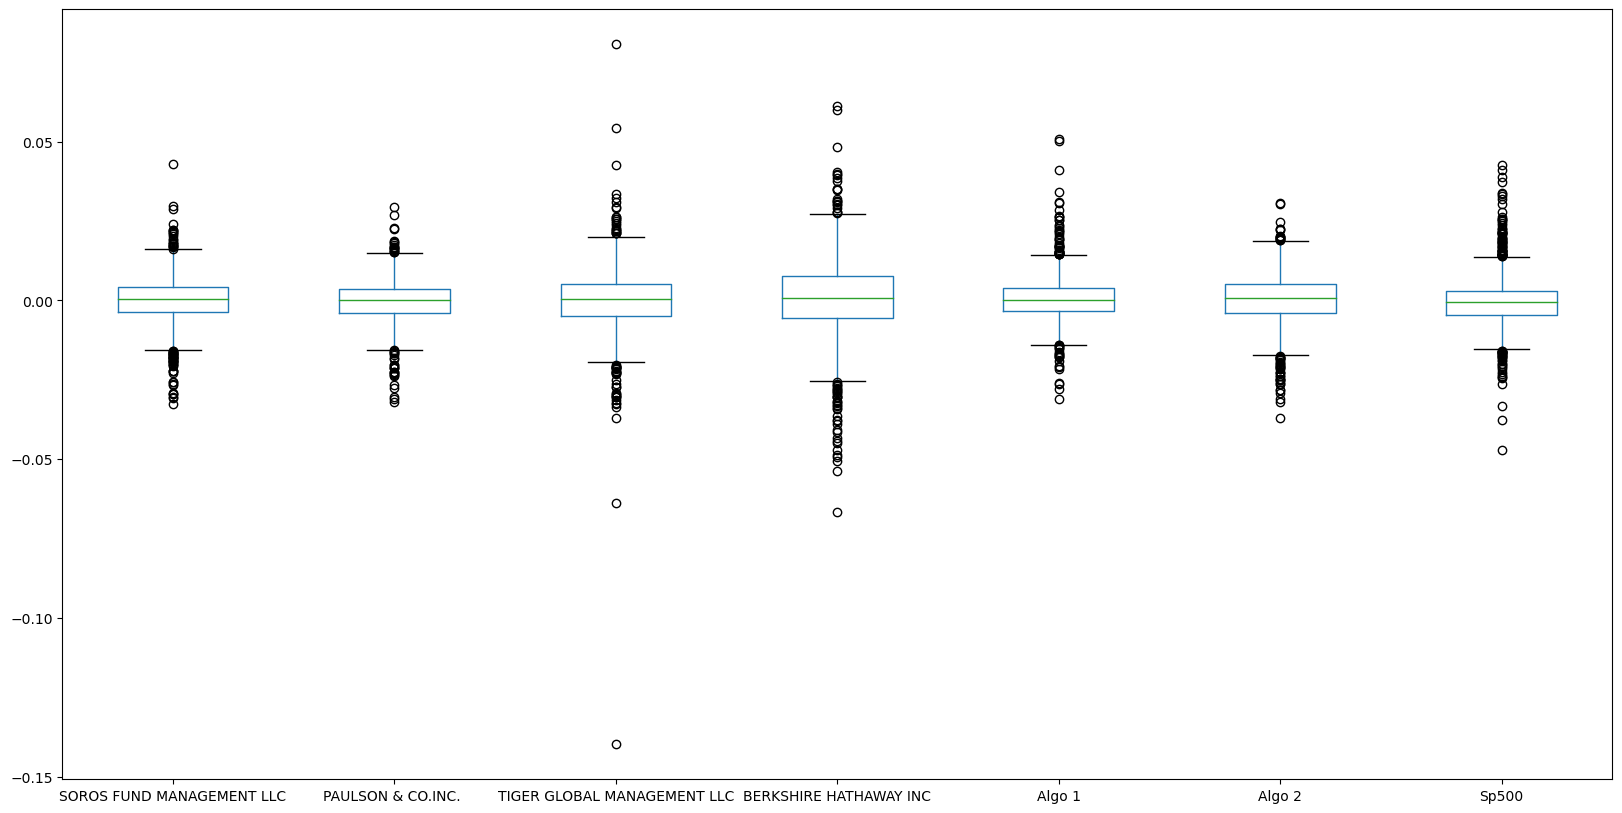

In [20]:
# Box plot to visually show risk
combined_info.boxplot(grid = False,figsize=(20,10));

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_info_std = combined_info.std()
combined_info_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Sp500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
combined_info_std>combined_info_std['Sp500']
# Determine which portfolios are riskier than the S&P 500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Sp500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_data = combined_info_std * np.sqrt(252)
annualized_data.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

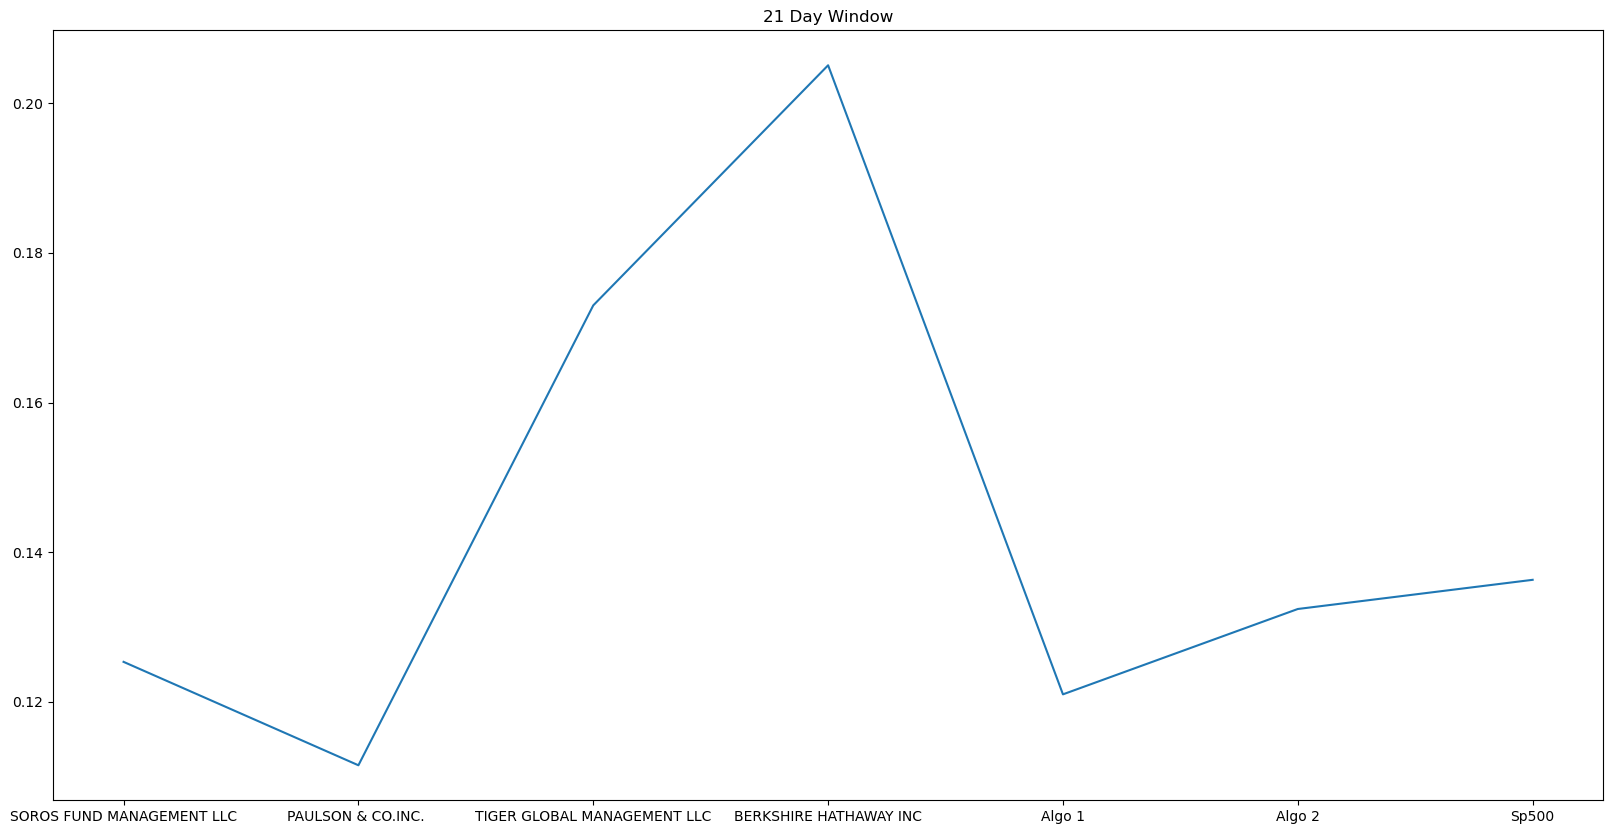

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
annualized_data.rolling(window=21).std()
# Plot the rolling standard deviation
annualized_data.plot(grid = False,figsize=(20,10),title=('21 Day Window'));

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_info.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Sp500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

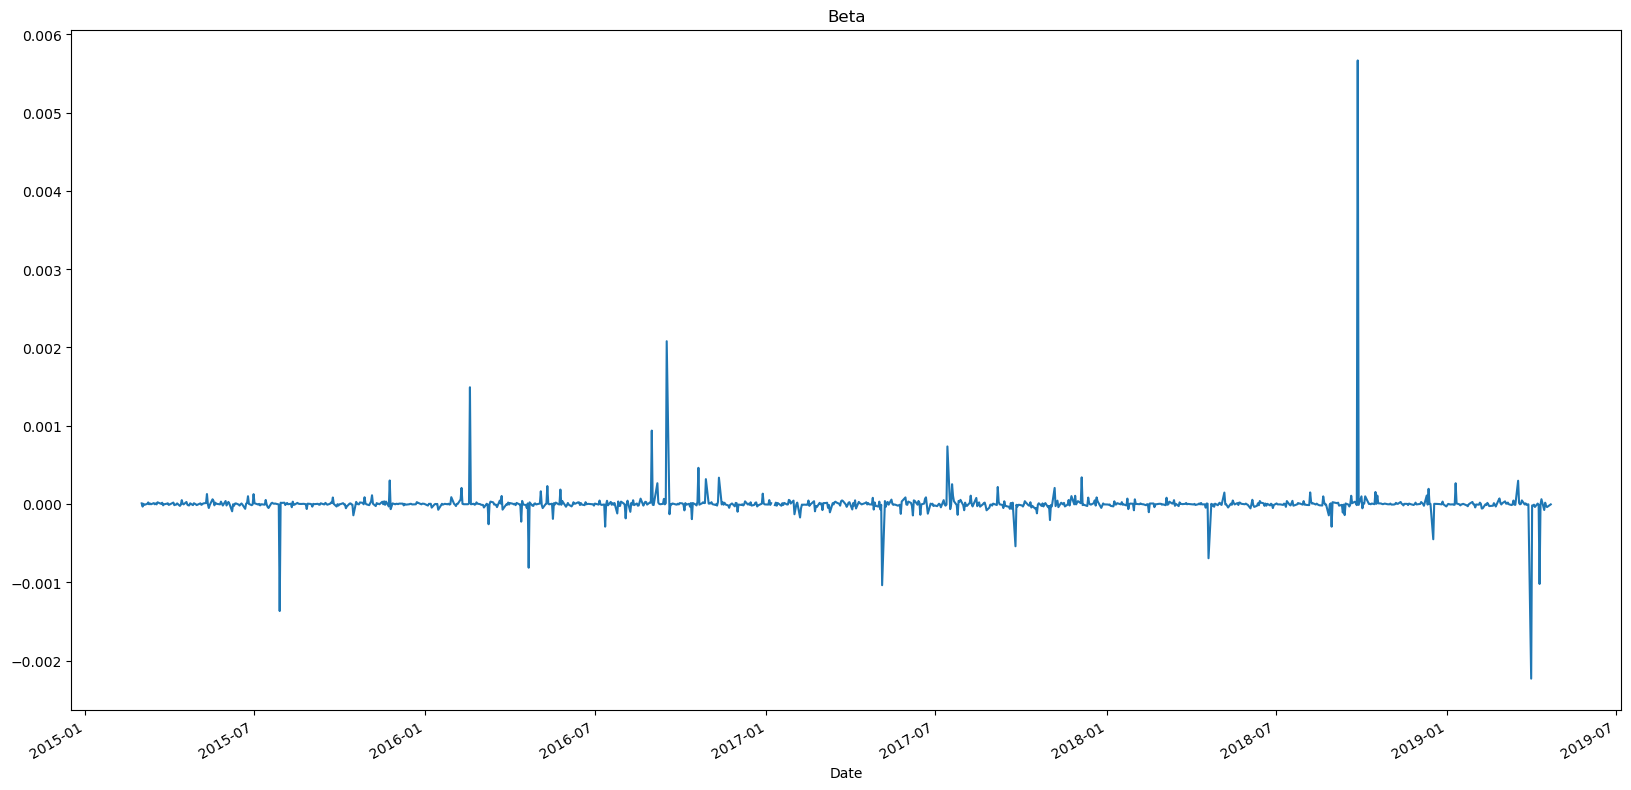

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_info['SOROS FUND MANAGEMENT LLC'].cov(combined_info['Sp500'])
# Calculate variance of S&P 500
variance = combined_info['Sp500']
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10),title=('Beta'));

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

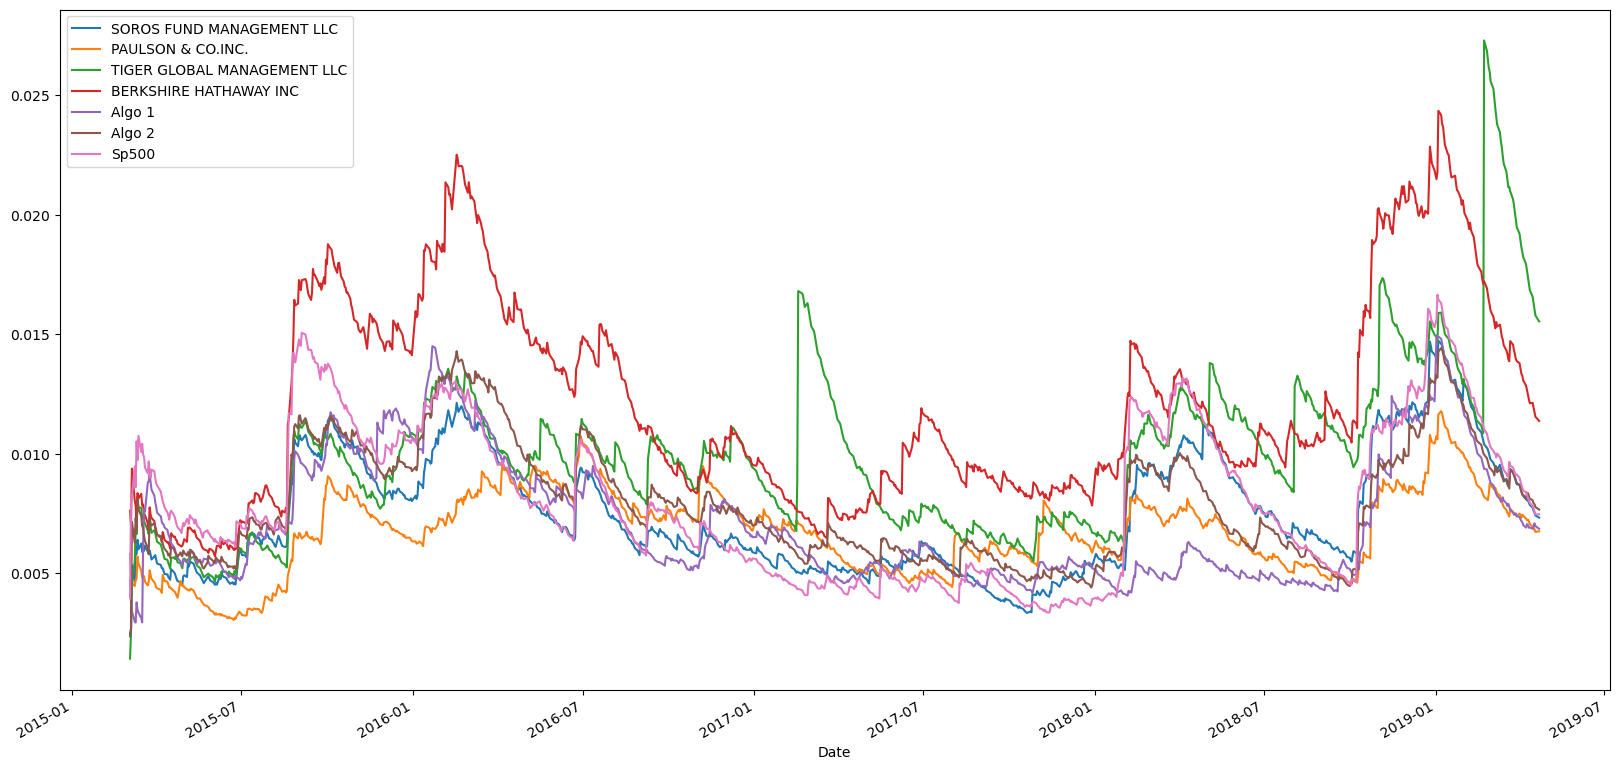

In [27]:
# Use `ewm` to calculate the rolling window
combined_info.ewm(halflife=21).std().plot(figsize=(20,10));

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sh_ratios = (combined_info.mean()) / (combined_info.std())
sh_ratios

SOROS FUND MANAGEMENT LLC      0.021600
PAULSON & CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
Sp500                         -0.032668
dtype: float64

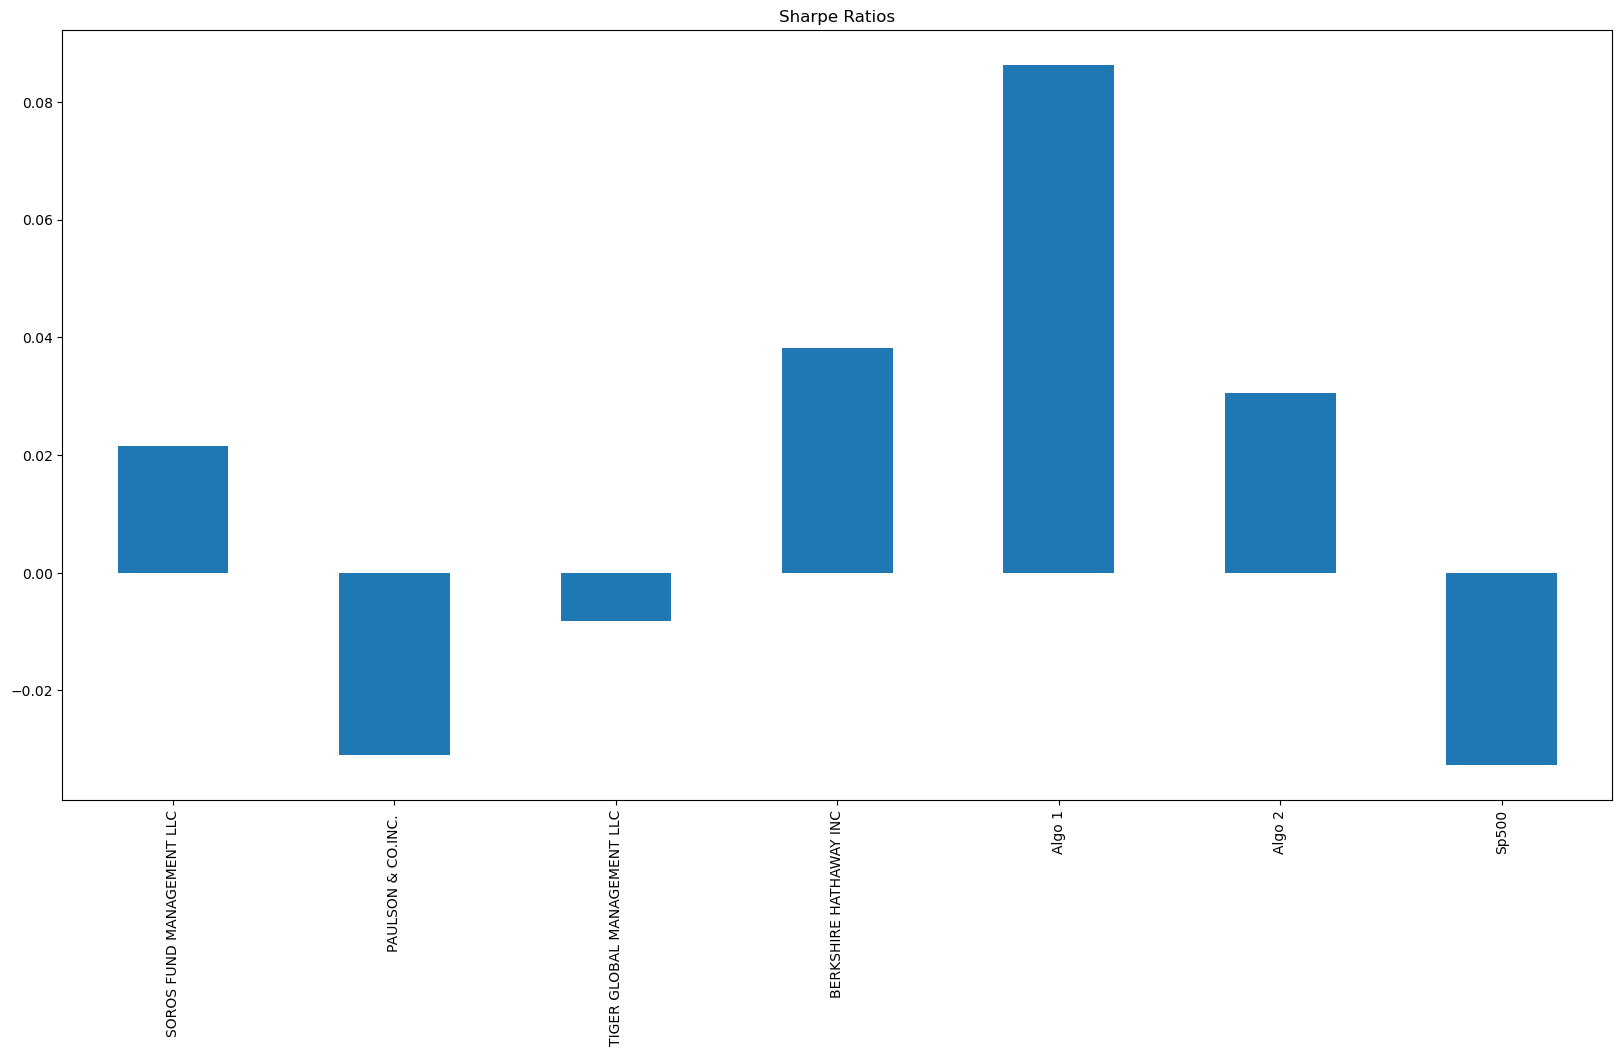

In [29]:
# Visualize the sharpe ratios as a bar plot
sh_ratios.plot(kind=('bar'), title=('Sharpe Ratios'), figsize=(20,10));

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
aapl_csv = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl = pd.read_csv(aapl_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
aapl.rename( columns={'Symbol' : 'AAPL','NOCP':'APPLE'},inplace = True )
aapl.drop(columns=['AAPL'], axis=1, inplace= True)

In [31]:
# Reading data from 2nd stock
cost_csv = Path('../Starter_Code/Resources/cost_historical.csv')
cost = pd.read_csv(cost_csv, index_col= 'Trade DATE', infer_datetime_format = True, parse_dates = True)
cost.rename( columns={'Symbol' : 'COSTH','NOCP':'COST'},inplace = True )
cost.drop(columns=['COSTH'], axis=1, inplace= True)

In [32]:
# Reading data from 3rd stock
goog_csv = Path('../Starter_Code/Resources/goog_historical.csv')
google = pd.read_csv(cost_csv, index_col= 'Trade DATE', infer_datetime_format = True, parse_dates = True)
google.rename( columns={'Symbol' : 'GOOG','NOCP':'GOOGLE'},inplace = True )
google.drop(columns=['GOOG'], axis=1, inplace= True)

In [50]:
google.sort_index()

,GOOGLE
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [49]:
# Combine all stocks in a single DataFrame
stocks_info = pd.concat([aapl,cost,google], axis="columns",join='inner')
stocks_info.head().sort_index()


,APPLE,COST,GOOGLE
Trade DATE,,,
2019-05-03,211.75,244.62,244.62
2019-05-06,208.48,244.23,244.23
2019-05-07,202.86,240.18,240.18
2019-05-08,202.90,241.34,241.34
2019-05-09,200.72,243.47,243.47


In [48]:
# Reset Date index
stocks_info.reset_index() 
stocks_info.head().sort_index()

,APPLE,COST,GOOGLE
Trade DATE,,,
2019-05-03,211.75,244.62,244.62
2019-05-06,208.48,244.23,244.23
2019-05-07,202.86,240.18,240.18
2019-05-08,202.90,241.34,241.34
2019-05-09,200.72,243.47,243.47


In [47]:
# Calculate daily returns
stock_returns = stocks_info.pct_change()
# Drop NAs
stock_returns.dropna(inplace=True)
# Display sample data
stock_returns.head().sort_index()

,APPLE,COST,GOOGLE
Trade DATE,,,
2019-05-02,-0.012279,-0.007890,-0.007890
2019-05-03,0.015685,0.001597,0.001597
2019-05-06,0.027704,0.016862,0.016862
2019-05-07,-0.000197,-0.004806,-0.004806
2019-05-08,0.010861,-0.008749,-0.008749


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = stock_returns.dot(weights)
# Display sample data
portfolio_return = pd.DataFrame(portfolio_return)
portfolio_return.columns=['My Research']
portfolio_return.head().sort_index()



,My Research
Trade DATE,
2019-05-02,-0.009353
2019-05-03,0.006293
2019-05-06,0.020476
2019-05-07,-0.003270
2019-05-08,-0.002212


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
# combined_stocks2 = pd.concat([combined_info,portfolio_return], axis="columns",join='inner')
# combined_stocks2.rename(columns= {0: "My Research"},inplace = True )
# combined_stocks2.head()
combined_info['my research'] = portfolio_return
combined_info.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500,my research
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_info = combined_info.dropna().copy()
combined_info

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500,my research
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000371
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.004421
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.013919
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-0.000851
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003361
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.002657
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.006964
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001872


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
combined_risk= combined_info.std() * np.sqrt(252) 
combined_risk

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
Sp500                          0.152147
my research                    0.208184
dtype: float64

### Calculate and plot rolling `std` with 21-day window

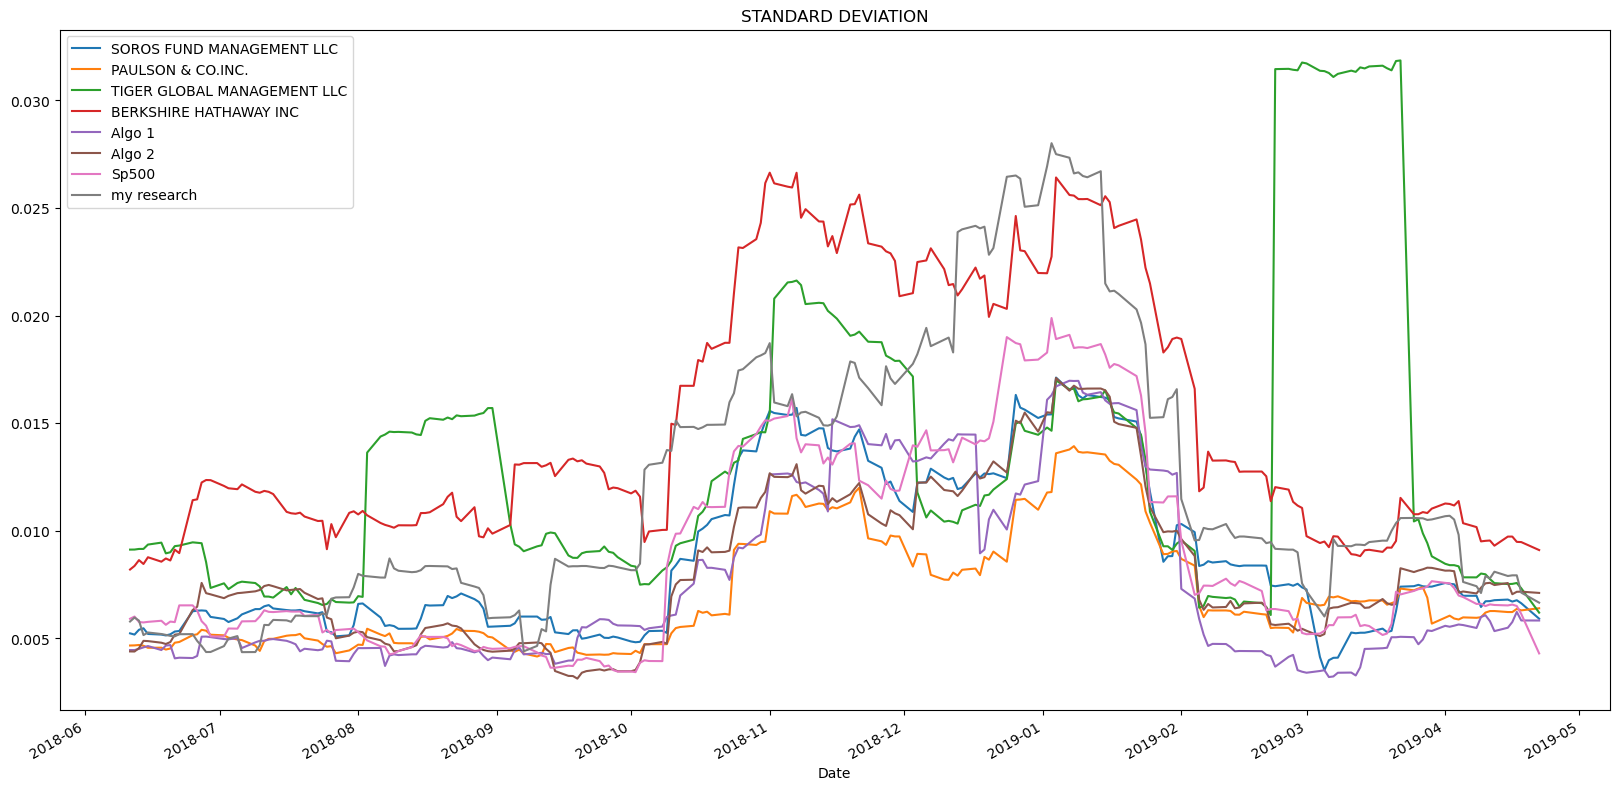

In [41]:
# Calculate rolling standard deviation
rolling_std = combined_info.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(grid = False,figsize=(20,10),title=('STANDARD DEVIATION'));




### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation
correlation = combined_info.corr()
# correlation.plot(figsize=(20,10),title=('CORRELATION'));
correlation.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500,my research
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.029682
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,-0.024251
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.043542
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,-0.023591
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.047543
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,-0.025035
Sp500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.770125
my research,0.029682,-0.024251,0.043542,-0.023591,0.047543,-0.025035,0.770125,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

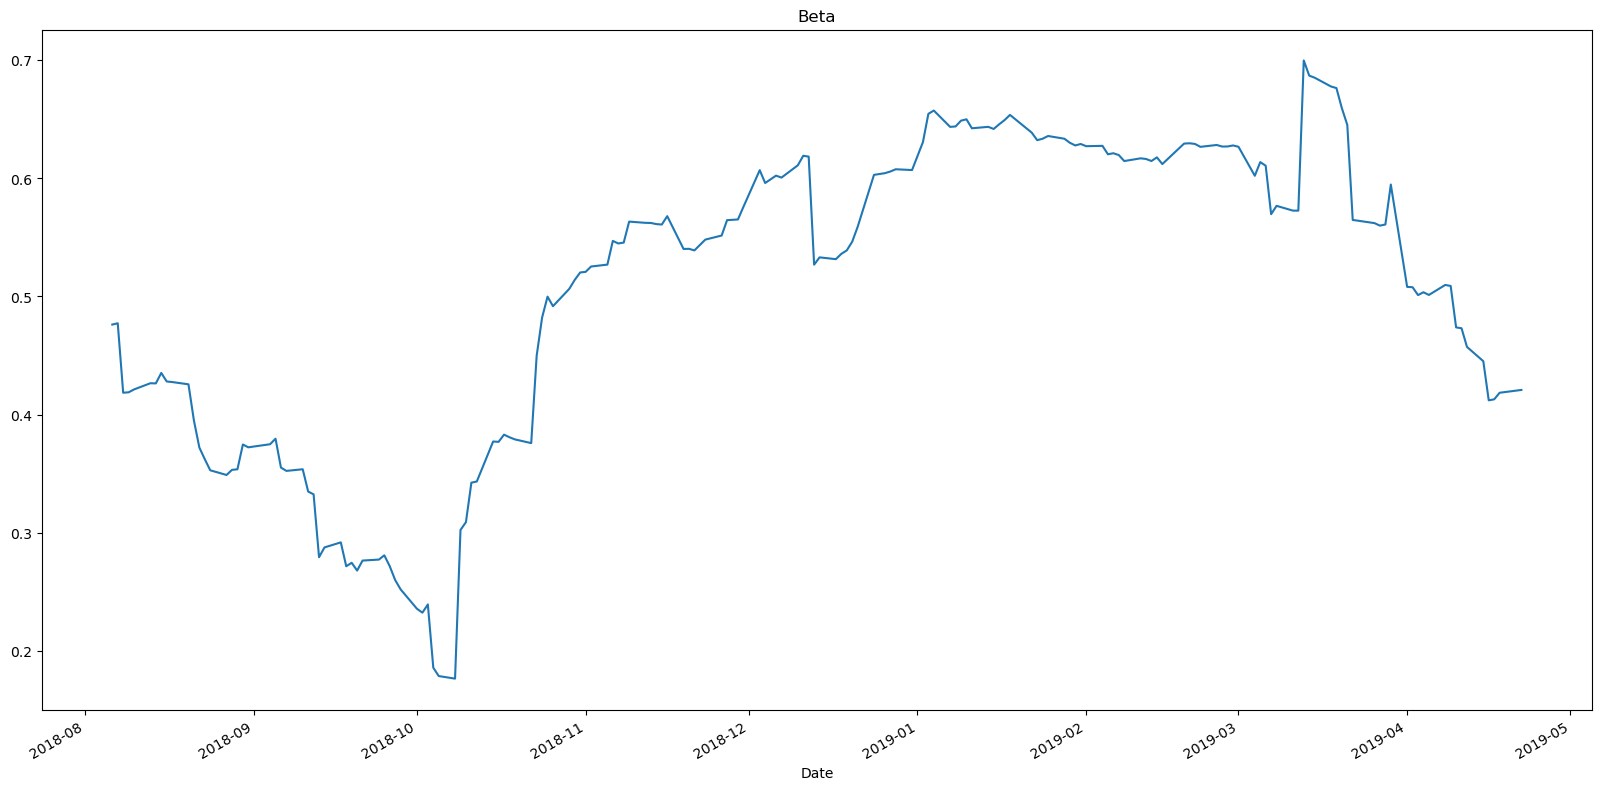

In [43]:
# Calculate and plot Beta
variance1 = combined_info['my research'].rolling(window=60).var()
covariance1 = combined_info['my research'].rolling(window=60).cov(combined_info['Sp500'])
beta1 = covariance1 / variance1
beta1.plot(figsize=(20, 10), title='Beta');




### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_anual =  (combined_info.mean() * 252) / (combined_info.std() * np.sqrt(252))
sharpe_ratios_anual 



SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
Sp500                         -0.432942
my research                   -0.789243
dtype: float64

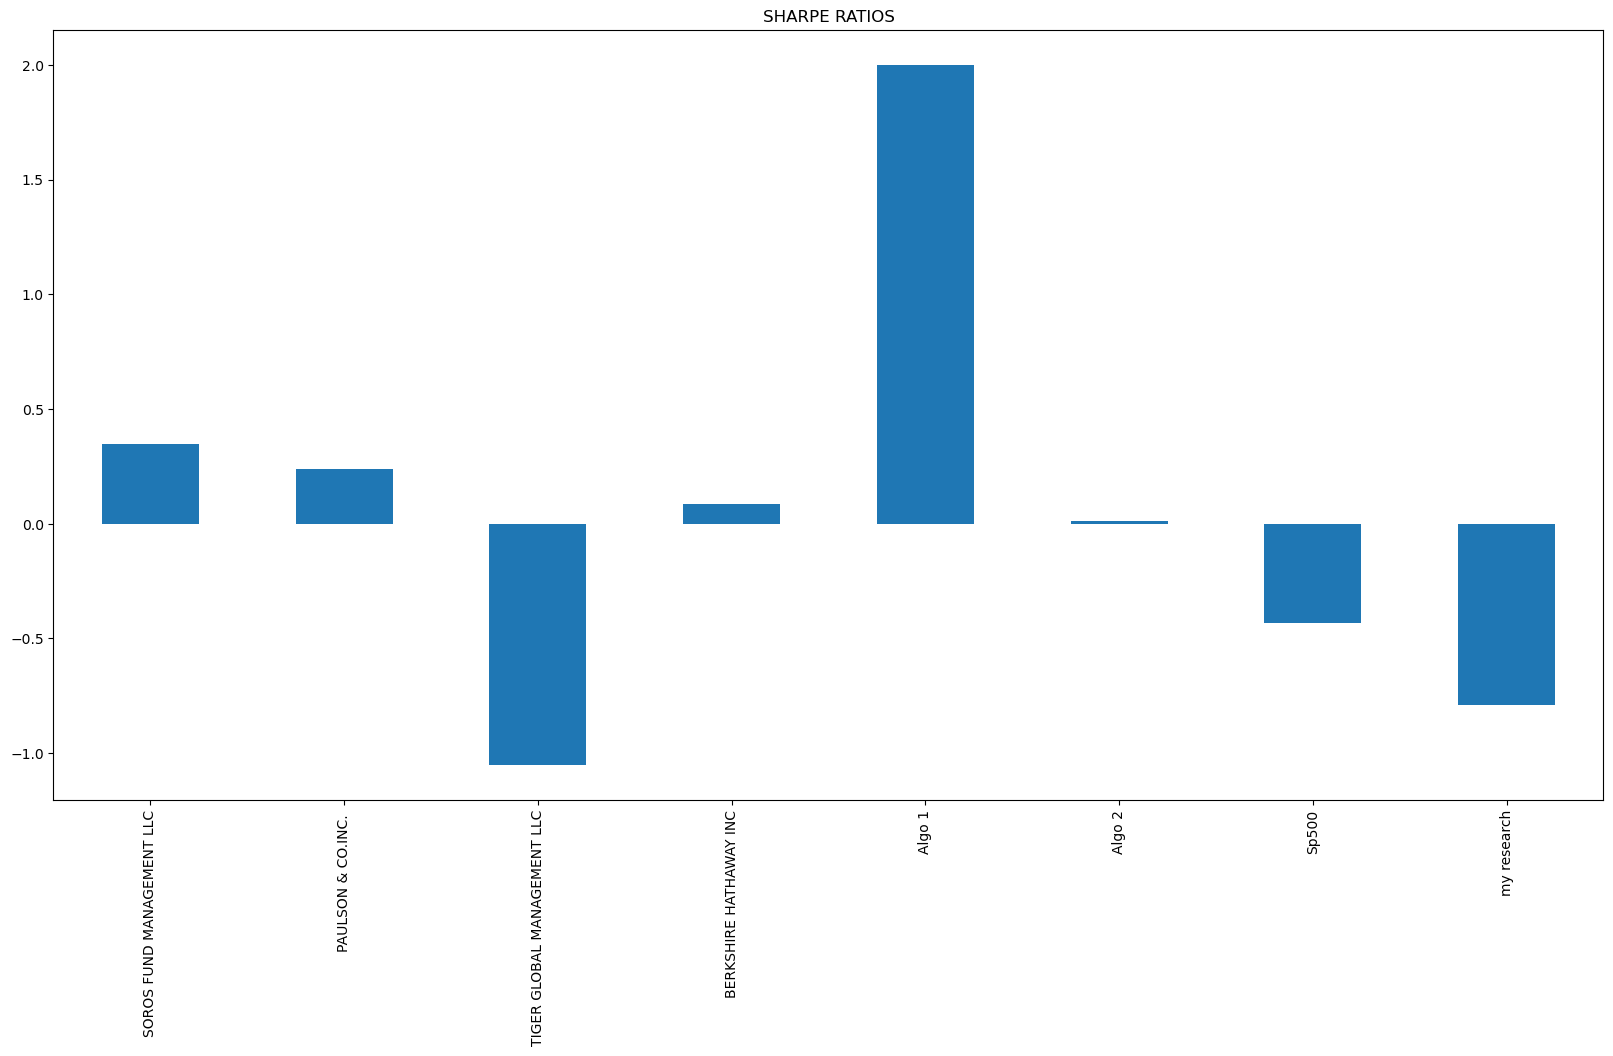

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_anual.plot(kind='bar', figsize=(20,10), title='SHARPE RATIOS');

### How does your portfolio do?

Write your answer here!

In [46]:
# My Portfolio compared to TIGER GLOBAL MANAGEMENT LLC did well but overall did poorly in comparison to all the other portfolios, 
# on the other hand Algo 1 did very well amongs all the portfolios.